<a href="https://colab.research.google.com/github/mehekswain74/MachineLearning/blob/main/DAY59.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Polynomial regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

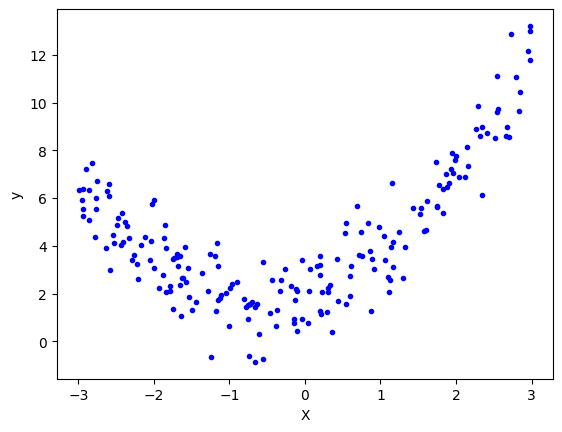

In [3]:
# Generating random data
x=6*np.random.rand(200,1)-3
y=0.8 * x**2 + 0.9 * x+2 + np.random.randn(200,1)

# y=0.8x^2 + 0.9x + 2  (equation of our data)

plt.plot(x,y,'b. ')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


In [4]:
# We are going to perform linear regression first
# Then polynomial regression

In [5]:
# Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [6]:
# Applying Linear regression

lr=LinearRegression()

In [7]:
lr.fit(x_train,y_train)

LinearRegression()

In [8]:
x.shape

(200, 1)

In [9]:
y.shape

(200, 1)

In [10]:
y_pred=lr.predict(x_test)

In [11]:
r2_score=(y_test,y_pred)

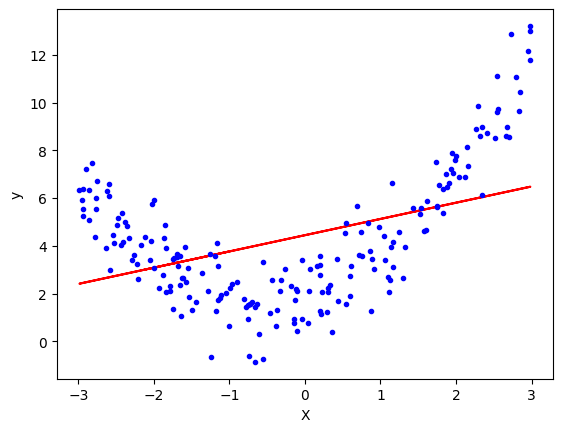

In [12]:
# Plotting the best fit line

plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x,y,'b. ')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [13]:
# Applying polynomial linear regression
# of degree 2
# we are transforming the features of the data set

poly=PolynomialFeatures(degree=2)

x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)

In [14]:
print(x_train[0])
print(x_train_trans[0])

[-2.1184689]
[ 1.         -2.1184689   4.48791047]


In [15]:
# include bias parameter

In [16]:
lr=LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [17]:
y_pred=lr.predict(x_test_trans)

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_test,y_pred)

0.8862530294190124

In [21]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.91294785 0.82719526]]
[1.98077048]


In [22]:
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
y_new=lr.predict(x_new_poly)

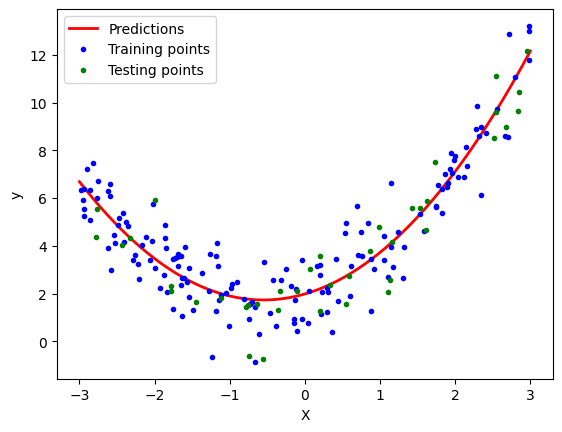

In [23]:
plt.plot(x_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(x_train,y_train,"b.",label="Training points")
plt.plot(x_test,y_test,"g.",label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [24]:
def polynomial_regression(degree):
  x_new=np.linspace(-3,3,100).reshape(100,1)
  x_new_poly=poly.transform(x_new)

  polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
  std_scaler=StandardScaler()
  lin_reg=LinearRegression()

  polynomial_regression=Pipeline([('poly_features',polybig_features),('std_scaler',std_scaler),('lin_reg',lin_reg)])
  polynomial_regression.fit(x,y)
  y_newbig=polynomial_regression.predict(x_new)
  plt.plot(x_new,y_newbig,"r-",linewidth=2,label="Degree "+str(degree))

  plt.plot(x_train,y_train,"b.",linewidth=3)
  plt.plot(x_test,y_test,"g.",linewidth=3)
  plt.xlabel("X")
  plt.ylabel("y")
  plt.axis([-3,3,0,10])
  plt.legend()
  plt.show()


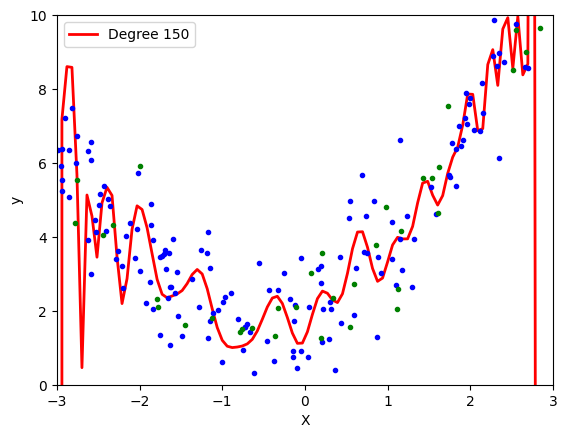

In [33]:
polynomial_regression(150)

In [34]:
# 3D polynomial regression

x= 7 * np.random.rand(100, 1) - 2.8
y =7 * np.random.rand(100, 1) - 2.8
z= x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2+np.random.randn(100,1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [36]:
import plotly.express as px
df= px.data.iris()
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [37]:
lr=LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input=np.linspace(x.min(),x.max(),10)
y_input=np.linspace(y.min(),y.max(),10)
xGrid,yGrid=np.meshgrid(x_input,y_input)
final=np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final=lr.predict(final).reshape(10,10)

